# Mašinsko učenje - Klasterovanje

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Zadatak 1

Iz učitanog skupa podataka izdvojiti grupe sličnih podataka.

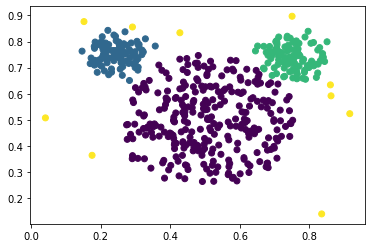

In [2]:
def ucitaj(putanja):
    with open(putanja) as fp:
        data = list(map(lambda l: list(map(lambda r: float(r), l.split(","))), fp.readlines()))
        data = np.array(data)
        return data

podaci = ucitaj("datasets/mouse.csv")
plt.scatter(podaci[:,0], podaci[:,1], c=podaci[:,2])

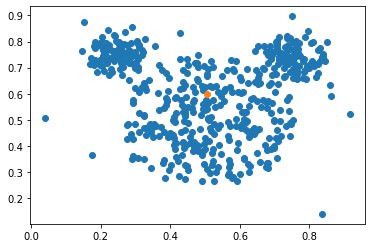

In [12]:
def dist(a, b):
    return np.sum((a-b)**2)

def kmeans(podaci, k=2, max_iter=1000):
    centri = np.random.rand(k, len(podaci[0]))
    korak = 0
    while korak < max_iter:
        grupe = [[] for i in range (k)]
        for p in podaci:
            dists = []
            for c in centri:
                dists.append(dist(p, c))
            grupe[np.argmin(dists)].append(p)
        for i, g in enumerate(grupe):
            centri [i] = np.average(np.array(g), 0)
        korak += 1
    return centri

centri = kmeans(podaci, 3, 10)
plt.scatter(podaci[:,0], podaci[:,1])
plt.scatter(centri[:,0], centri[:,1])
